# seaborn 라이브러리

## 1. 환경준비

* 라이브러리 불러오기

In [1]:
# anaconda 를 설치하게 되면, 다양한 패키지들이 함께 설치 됩니다.
# 그러나 이후에 패키지 업데이트를 위해서는 아래와 같은 작업이 필요합니다.

!pip install -U seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 아이리스 꽃 분류  
③ 보스톤 시, 타운별 집값   
④ 뉴욕 공기오염도 조사

In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0  1.0  
1  396.90   9.14  21.6  0.0  
2  392.83   4.03  34.7  0.0  
3  394.63   2.94  33.4  0.0  
4  396.90   5.33  36.2  0.0

In [5]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## 2. seaborn 다양한 차트들

### 1) 기본 차트들

* histogram : sns.histplot

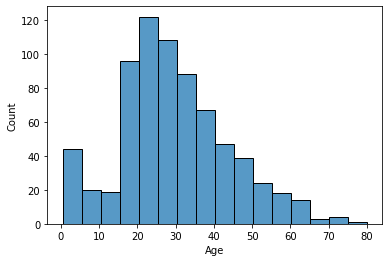

In [6]:
sns.histplot(data = titanic, x='Age', bins = 16)
plt.show()

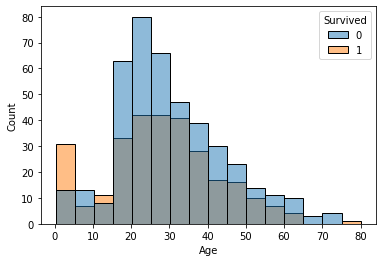

In [7]:
# hue = "xxx" => xxx별로 구분해서 차트를 구현하기

sns.histplot(data = titanic, x='Age', bins = 16, hue = 'Survived')
plt.show()

* densityplot : sns.kdeplot

In [8]:
sns.kdeplot(data = titanic, x = 'Age')
plt.show()

In [9]:
# hue method = 구분해서 차트 그리기

sns.kdeplot(data = titanic, x = 'Age', hue = 'Survived')
plt.show()

* boxplot

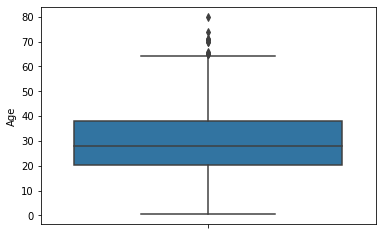

In [10]:
sns.boxplot(data = titanic, y = 'Age')
plt.show()

In [11]:
sns.boxplot(data = titanic, y = 'Age', x = 'Survived')
plt.show()

#### 연습

* titanic의 Fare에 대해서, Pclass 별로 비교하는 차트를 그려봅시다.
    * histplot()
    * kdeplot()
    * boxplot()

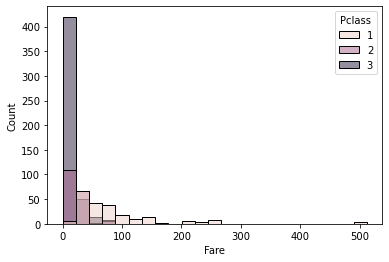

In [17]:
# histplot

sns.histplot(data = titanic, x = 'Fare', bins = 23, hue='Pclass')
plt.show()

In [21]:
# kdeplot

sns.kdeplot(data = titanic, x = 'Fare', hue = 'Pclass')
plt.show()

In [23]:
# boxplot

sns.boxplot(data = titanic, y = 'Fare', x = 'Pclass')
plt.show()

In [26]:
sns.boxplot(data = titanic, x = 'Fare', y = 'Pclass', orient = 'h')
plt.show()

### 2) distplot : histogram + density plot

In [27]:
sns.distplot(titanic['Age'], bins = 16, hist_kws = dict(edgecolor='grey'))
plt.show()

# 빨간색 = 미래에 다른 이름의 함수로 나올 수 있으며, 경고성 알림일 뿐이다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


###  3) joinplot : scatter + histogram(혹은 density plot)

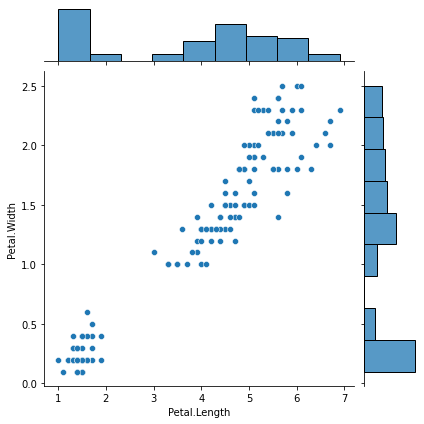

In [28]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris)
plt.show()

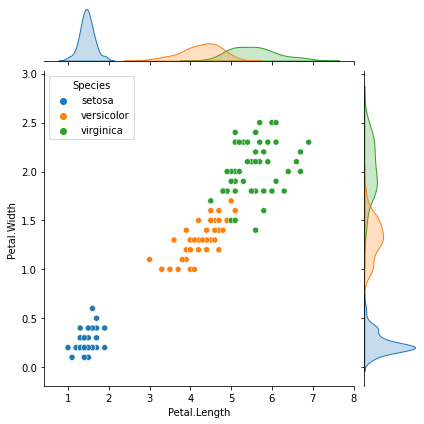

In [29]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris, hue = 'Species')
plt.show()

### 4) pairplot : scatter + histogram(혹은 density plot) 확장


In [30]:
sns.pairplot(iris, hue = 'Species')
plt.show()

### 5) countplot : 집계 + bar plot

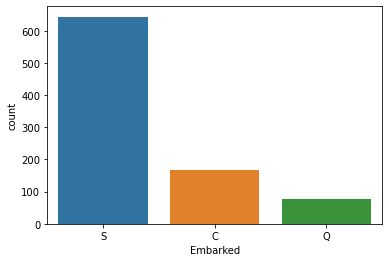

In [31]:
sns.countplot(x="Embarked", data=titanic)
plt.show()

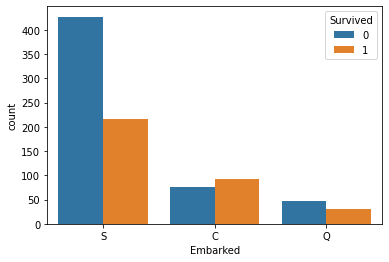

In [32]:
sns.countplot(x="Embarked", data=titanic, hue = 'Survived')
plt.show()

### 6) barplot : 평균비교 bar plot + error bar

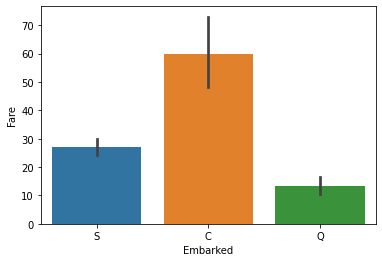

In [33]:
sns.barplot(x="Embarked", y="Fare", data = titanic)
plt.show()

### 7) heatmap : 두 범주 집계 시각화

In [34]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp2 = temp1.pivot('Embarked','Pclass', 'PassengerId')
print(temp1)
print("=====================")
print(temp2)

sns.heatmap(temp2, annot = True)
plt.show()

  Embarked  Pclass  PassengerId
0        C       1           85
1        C       2           17
2        C       3           66
3        Q       1            2
4        Q       2            3
5        Q       3           72
6        S       1          127
7        S       2          164
8        S       3          353
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


* 추가 : pivot

In [35]:
# zn2별, chas별, 평균 medv

temp1 = boston.groupby(['zn2', 'chas'], as_index = False)['medv'].mean()
temp1.pivot('zn2', 'chas', 'medv')

chas          0          1
zn2                       
0.0   19.959697  26.600000
1.0   27.240244  33.433333
2.0   29.000000  50.000000